# 感知机 Perceptron

In [1]:
import numpy as np
import pandas as pd
import sklearn as sl
import matplotlib.pyplot as plt
import random
import time

print('Packages loaded')

Packages loaded


In [2]:
class perceptron:
    def __init__(self, X_train, Y_train, learning_rate=0.0001, tol=0):
        '''
        Parameters
        ----------
        
        X_train:Array, default=None
            dataset for training
        
        Y_train:Array, default=None
            labelset for training
        
        learning_rate:float,default=0.0001
        
        tol:int, default=0
            the stopping criterion. When the number of misclassification 
            points small or equal to tol, stop training.
        '''
        self.X_train=np.mat(X_train)
        self.Y_train=np.mat(Y_train).T
        self.m,self.n=np.shape(self.X_train)
        self.w=np.zeros((1,np.shape(self.X_train)[1]))
        self.b=0
        self.learning_rate=learning_rate
        self.tol=tol
        
    def calculate(self, x, w, b):
        return np.dot(x,w.T)+b
    
    def train(self):
        '''
        returns
        -------
        
        w: np.mat
            weights
        b: np.mat
            bias        
        '''
        is_wrong=False
        while not is_wrong:
            wrong_count=0
            for s in range(self.m):
                xi=self.X_train[s]
                yi=self.Y_train[s]
                if self.calculate(xi,self.w,self.b)*yi <= 0:
                    self.w=self.w+self.learning_rate*yi*xi
                    self.b=self.b+self.learning_rate*yi
                    wrong_count+=1
            if wrong_count <=self.tol:
                is_wrong=True
        return self.w,self.b
    
    def score(self):
        pass
    
    def plot(self):
        pass
    

## 使用sklearn iris的数据集

     sepal length  sepal width  petal length  petal width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


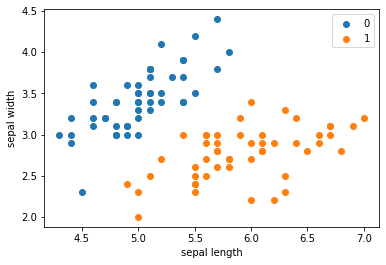

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['label']=iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
print(df)

#二元分类，只使用label=0，1的数据。
#为了直观表现，只用2个维度'sepal length', 'sepal width'
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [4]:
(dataset,labelset)=load_iris(return_X_y=True)
dataset=dataset[0:100,[0,1]]
labelset=labelset[0:100]
# 规范label
labelset=np.array([1 if i==1 else -1 for i in labelset])

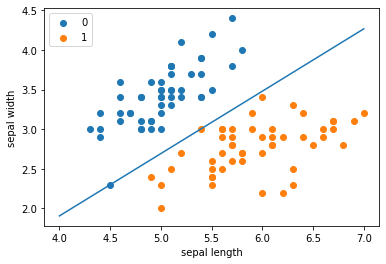

In [5]:
model=perceptron(dataset,labelset)
(w,b)=model.train()
w=np.array(w)[0]
b=np.array(b)[0]

x_points=np.linspace(4,7,10)
y_points=-(w[0]*x_points+b)/w[1]
plt.plot(x_points,y_points)
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## sklearn 实例

In [6]:
import sklearn
from sklearn.linear_model import Perceptron
sklearn.__version__

'0.22.2.post1'

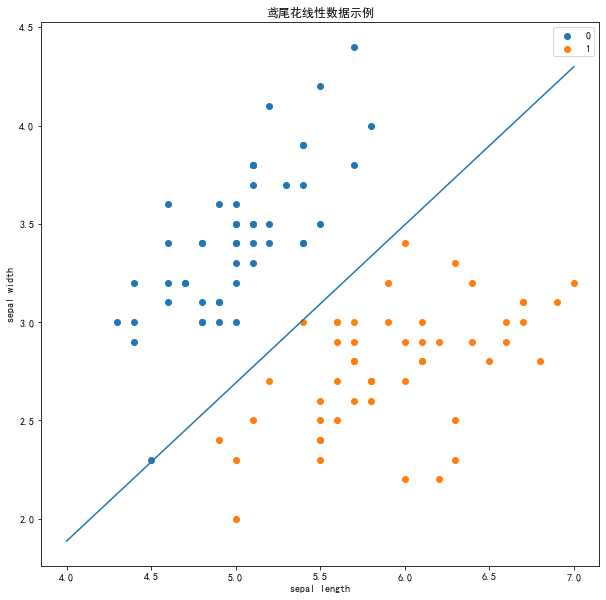

In [7]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(dataset, labelset)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()